# SSO 2020
## Klasifikasi Revenue

**Import Dataset**

In [108]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data Latih Online Shoppers.csv')

**Explorasi Data**

In [18]:
# data.shape
# data.head()
# data.Weekend.value_counts()
# data.Revenue.value_counts()
# data[data.Administrative.isnull() == True]
# data.ProductRelated[data.ProductRelated == 0]
# data.info()
print('Administrative max: ', data.Administrative.max(), 'Administrative min: ', data.Administrative.min())
print('Informational max: ', data.Informational.max(), 'Informational min: ', data.Informational.min())
print('ProductRelated max: ', data.ProductRelated.max(), 'ProductRelated min: ', data.ProductRelated.min())
print('Administrative_Duration max: ', data.Administrative_Duration.max(), 'Administrative_Duration min: ', data.Administrative_Duration.min())
print('Informational_Duration max: ', data.Informational_Duration.max(), 'Informational_Duration min: ', data.Informational_Duration.min())
print('ProductRelated_Duration max: ', data.ProductRelated_Duration.max(), 'ProductRelated_Duration min: ', data.ProductRelated_Duration.min())

Administrative max:  26.0 Administrative min:  0.0
Informational max:  24.0 Informational min:  0.0
ProductRelated max:  705.0 ProductRelated min:  0.0
Administrative_Duration max:  3398.75 Administrative_Duration min:  -1.0
Informational_Duration max:  2549.375 Informational_Duration min:  -1.0
ProductRelated_Duration max:  63973.522229999995 ProductRelated_Duration min:  -1.0


**Keterangan:** Administrative - SpecialDay adalah numerik, sisanya kategorik. Kategorik yg harus dilakukan encoding adalah variabel *Month, VisitorType, Weekend, dan Revenue*

In [30]:
data[data.Administrative.isnull() == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


**Note:** Terdapat 14 observasi yang memiliki missing value pada semua 8 variabel pertama

**Plot the data**
* Revenue

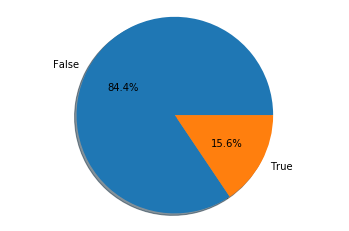

In [60]:
import matplotlib.pyplot as plt
labels = list(data.Revenue.unique())
sizes = list(data.Revenue.value_counts())
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

* Administrative - ProductRelated_Duration


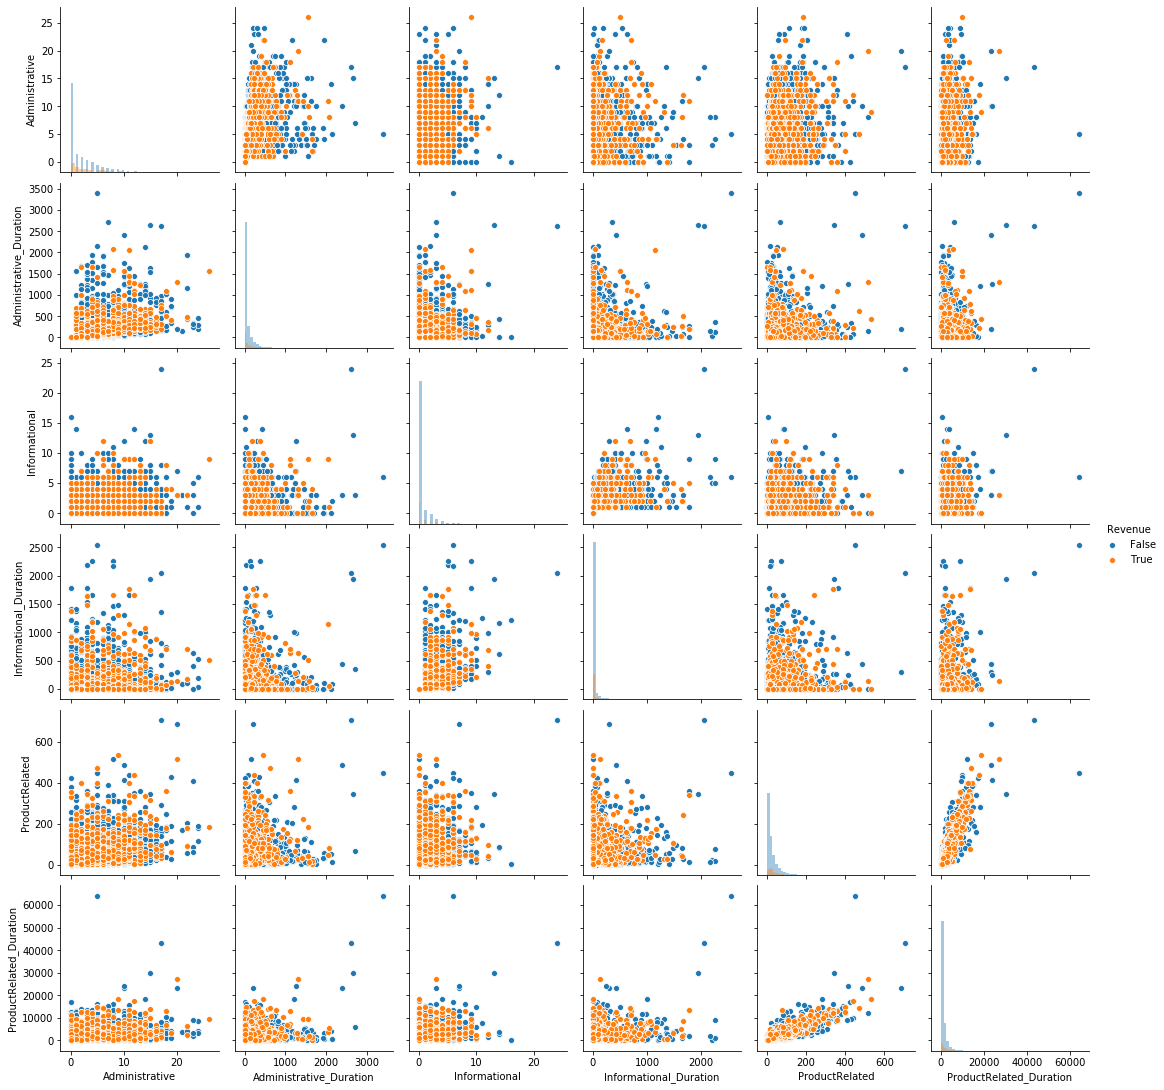

In [106]:
import seaborn as sns
g = sns.PairGrid(data, vars = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
                               "ProductRelated", "ProductRelated_Duration"], hue='Revenue')
g.map_diag(sns.distplot, kde = False)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Note:** Yang terlihat memiliki korelasi adalah *ProductRelated dengan ProductRelated_Duration

* BounceRates - SpecialDay

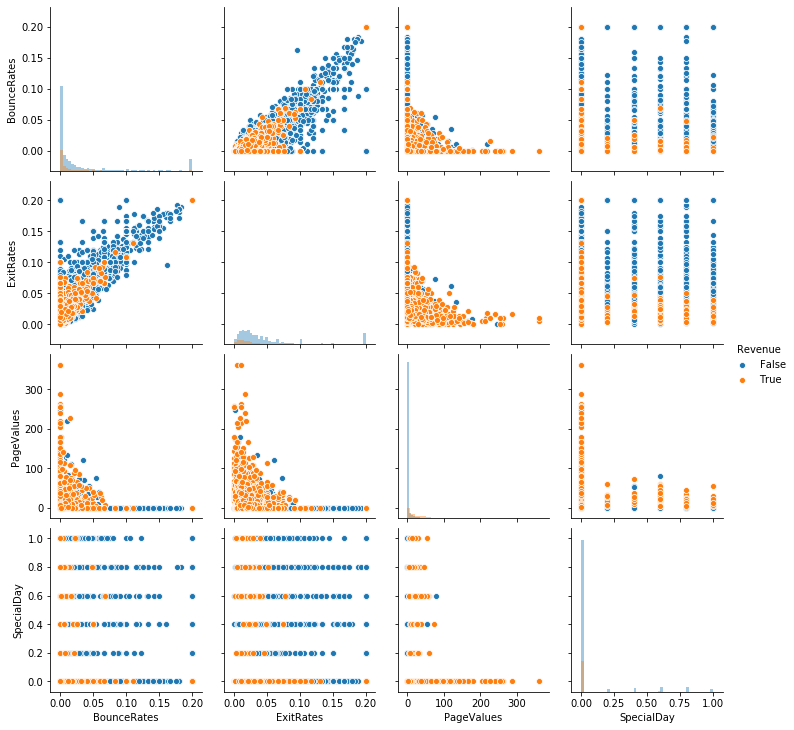

In [123]:
g = sns.PairGrid(data, vars = ["BounceRates", "ExitRates", "PageValues", "SpecialDay"], hue='Revenue')
g.map_diag(sns.distplot, kde = False)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Note:** ExitRates dan BounceRates memiliki korelasi

Lihat Boxplot tiap variabel numerik


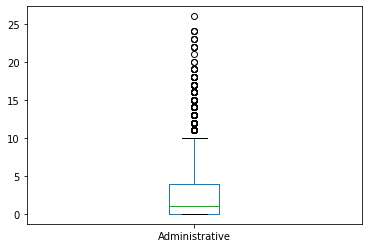

In [5]:
import matplotlib.pyplot as plt
boxplot = data.boxplot(column=["Administrative"], vert=True, grid=False)

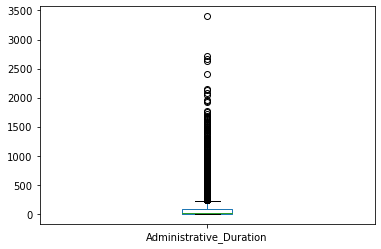

In [6]:
boxplot = data.boxplot(column=["Administrative_Duration"], vert=True, grid=False)

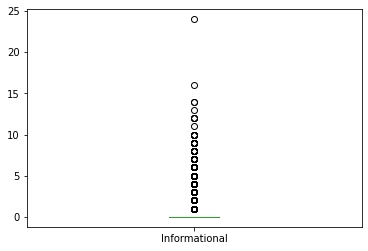

In [7]:
boxplot = data.boxplot(column=["Informational"], vert=True, grid=False)

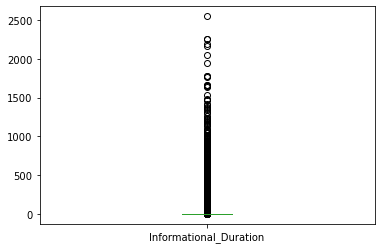

In [8]:
boxplot = data.boxplot(column=["Informational_Duration"], vert=True, grid=False)

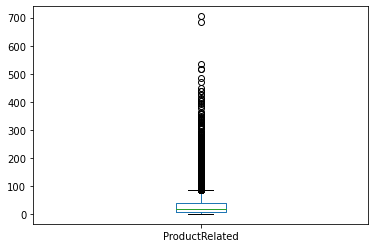

In [9]:
boxplot = data.boxplot(column=["ProductRelated"], vert=True, grid=False)

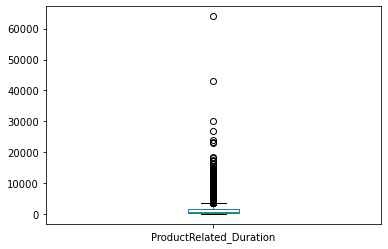

In [10]:
boxplot = data.boxplot(column=["ProductRelated_Duration"], vert=True, grid=False)

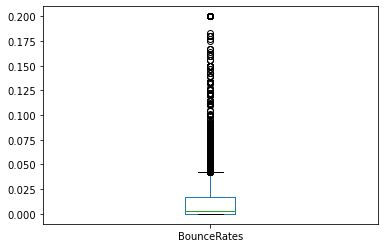

In [11]:
boxplot = data.boxplot(column=["BounceRates"], vert=True, grid=False)

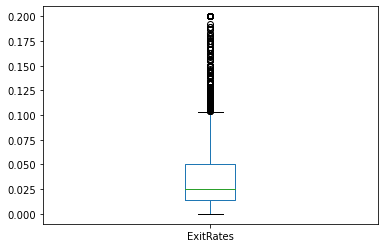

In [12]:
boxplot = data.boxplot(column=["ExitRates"], vert=True, grid=False)

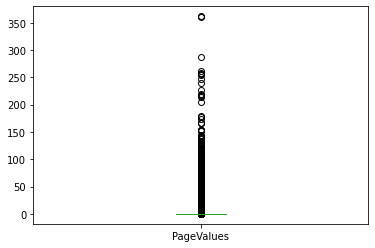

In [13]:
boxplot = data.boxplot(column=["PageValues"], vert=True, grid=False)

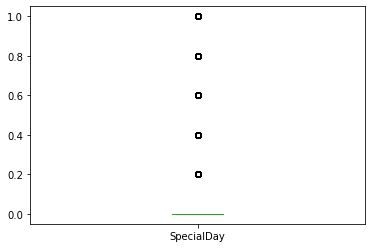

In [14]:
boxplot = data.boxplot(column=["SpecialDay"], vert=True, grid=False)

**Lihat persebaran data satu2**

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ProductRelated', ylabel='Density'>

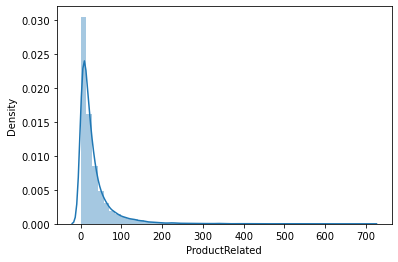

In [21]:
import seaborn as sns
# sns.distplot(data.Administrative)
# sns.distplot(data.Informational, kde = False)
sns.distplot(data.ProductRelated)
# sns.distplot(data.Administrative_Duration)
# sns.distplot(data.Informational_Duration, kde = False)
# sns.distplot(data.ProductRelated_Duration)

**Note:** Setiap duration ada missing value (-1) pada observasi yang sama, 30 obs

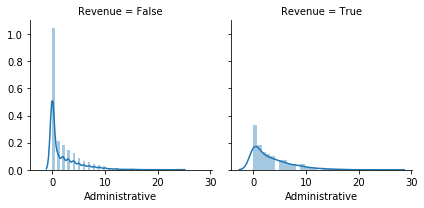

In [98]:
a = sns.FacetGrid(data, col = "Revenue")
a.map(sns.distplot, "Administrative")

**Note:** Terlalu banyak outlier dan semuanya positive skewed sehingga doesnt make sense kalo outliernya mau dihilangkan dan dilakukan imputasi. Pilihannya 2: tetap seperti ini atau dijadikan kategorik


**Sebelum mulai preprocessing data dibagi dulu jadi training testing**

In [109]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 123, stratify = data["Revenue"])

In [93]:
data_train.isnull().sum()

Administrative             10
Administrative_Duration    10
Informational              10
Informational_Duration     10
ProductRelated             10
ProductRelated_Duration    10
BounceRates                10
ExitRates                  10
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

**Preprocessing Data**:
Missing value,
Transformation,
Outlier,
Encoding,
Feature Selection

* Missing Value

In [110]:
data_train['Administrative'][list(data_train['Administrative'].isnull()==True)] = data_train.Administrative.median()
data_train['Administrative_Duration'][list(data_train['Administrative_Duration'].isnull()==True)] = data_train.Administrative_Duration.median()
data_train['Informational'][list(data_train['Informational'].isnull()==True)] = data_train.Informational.median()
data_train['Informational_Duration'][list(data_train['Informational_Duration'].isnull()==True)] = data_train.Informational_Duration.median()
data_train['ProductRelated'][list(data_train['ProductRelated'].isnull()==True)] = data_train.ProductRelated.median()
data_train['ProductRelated_Duration'][list(data_train['ProductRelated_Duration'].isnull()==True)] = data_train.ProductRelated_Duration.median()
data_train['BounceRates'][list(data_train['BounceRates'].isnull()==True)] = data_train.BounceRates.median()
data_train['ExitRates'][list(data_train['ExitRates'].isnull()==True)] = data_train.ExitRates.median()

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Missing value diimputasi dengan median

In [111]:
data_train['Administrative_Duration'][data_train['Administrative_Duration']<0] = data_train.Administrative_Duration.median()
data_train['Informational_Duration'][data_train['Informational_Duration']<0] = data_train.Informational_Duration.median()
data_train['ProductRelated_Duration'][data_train['ProductRelated_Duration']<0] = data_train.ProductRelated_Duration.median()

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [112]:
data_test['Administrative'][list(data_test['Administrative'].isnull()==True)] = data_train.Administrative.median()
data_test['Administrative_Duration'][list(data_test['Administrative_Duration'].isnull()==True)] = data_train.Administrative_Duration.median()
data_test['Informational'][list(data_test['Informational'].isnull()==True)] = data_train.Informational.median()
data_test['Informational_Duration'][list(data_test['Informational_Duration'].isnull()==True)] = data_train.Informational_Duration.median()
data_test['ProductRelated'][list(data_test['ProductRelated'].isnull()==True)] = data_train.ProductRelated.median()
data_test['ProductRelated_Duration'][list(data_test['ProductRelated_Duration'].isnull()==True)] = data_train.ProductRelated_Duration.median()
data_test['BounceRates'][list(data_test['BounceRates'].isnull()==True)] = data_train.BounceRates.median()
data_test['ExitRates'][list(data_test['ExitRates'].isnull()==True)] = data_train.ExitRates.median()
data_test['Administrative_Duration'][data_test['Administrative_Duration']<0] = data_train.Administrative_Duration.median()
data_test['Informational_Duration'][data_test['Informational_Duration']<0] = data_train.Informational_Duration.median()
data_test['ProductRelated_Duration'][data_test['ProductRelated_Duration']<0] = data_train.ProductRelated_Duration.median()

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

-1 dianggap missing value dan diimputasi dengan median. Data test diimputasi dengan parameter dari data train


**Feature Scaling a.k.a Transformasi**

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train[["Administrative","Administrative_Duration", "Informational","Informational_Duration", "ProductRelated",
            "ProductRelated_Duration","BounceRates", "ExitRates", "PageValues",
            "SpecialDay"]] = scaler.fit_transform(data_train[["Administrative","Administrative_Duration", 
                                                              "Informational", "Informational_Duration", 
                                                              "ProductRelated", "ProductRelated_Duration", 
                                                              "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]) 

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


**Note:** Dilakukan standardisasi pada semua variabel numerik

In [114]:
rerata = scaler.mean_
stadev = scaler.scale_

In [34]:
3.33838097*3.33838097

11.14478750085814

In [115]:
def scale_data(array,means=rerata,stds=stadev):
    return (array-means)/stds

data_test[["Administrative","Administrative_Duration", "Informational","Informational_Duration", "ProductRelated",
            "ProductRelated_Duration","BounceRates", "ExitRates", "PageValues",
            "SpecialDay"]] = scale_data(data_test[["Administrative","Administrative_Duration", 
                                                              "Informational", "Informational_Duration", 
                                                              "ProductRelated", "ProductRelated_Duration", 
                                                              "BounceRates", "ExitRates", "PageValues", "SpecialDay"]])

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Note:** data test distandardisasi dengan menggunakan parameter dari data train

In [38]:
data_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Administrative_scaled,Administrative_Duration_scaled,Informational_scaled,Informational_Duration_scaled,ProductRelated_scaled,ProductRelated_Duration_scaled,BounceRates_scaled,ExitRates_scaled,PageValues_scaled,SpecialDay_scaled
10473,0.0,0.0,1.0,6.0,39.0,720.150000,0.005128,0.017949,0.000000,0.0,...,-0.695196,-0.445814,0.383342,-0.202556,0.151612,-0.251801,-0.313064,-0.451298,-0.315263,-0.306063
3911,3.0,30.5,0.0,0.0,20.0,1839.833333,0.000000,0.007540,0.000000,0.0,...,0.203443,-0.280130,-0.396073,-0.245514,-0.272056,0.322579,-0.400573,-0.629850,-0.315263,-0.306063
10219,0.0,0.0,0.0,0.0,10.0,192.750000,0.033333,0.028889,0.000000,0.0,...,-0.695196,-0.445814,-0.396073,-0.245514,-0.495040,-0.522349,0.168233,-0.263635,-0.315263,-0.306063
6669,3.0,1178.6,4.0,124.8,18.0,1716.373333,0.008333,0.016667,0.000000,0.0,...,0.203443,5.956685,2.721585,0.648010,-0.316653,0.259246,-0.258372,-0.473290,-0.315263,-0.306063
8247,3.0,57.0,0.0,0.0,42.0,3556.516667,0.000000,0.009683,26.983623,0.0,...,0.203443,-0.136174,-0.396073,-0.245514,0.218507,1.203210,-0.400573,-0.593093,1.082770,-0.306063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,0.0,0.0,0.0,0.0,2.0,0.000000,0.200000,0.200000,0.000000,0.0,...,-0.695196,-0.445814,-0.396073,-0.245514,-0.673426,-0.621226,3.012264,2.671532,-0.315263,-0.306063
7160,0.0,0.0,0.0,0.0,20.0,593.701980,0.000000,0.005364,20.826132,0.0,...,-0.695196,-0.445814,-0.396073,-0.245514,-0.272056,-0.316667,-0.400573,-0.667163,0.763748,-0.306063
708,0.0,0.0,0.0,0.0,6.0,25.000000,0.000000,0.033333,0.000000,0.0,...,-0.695196,-0.445814,-0.396073,-0.245514,-0.584233,-0.608402,-0.400573,-0.187397,-0.315263,-0.306063
1349,0.0,0.0,0.0,0.0,14.0,198.522150,0.001231,0.067972,0.000000,0.0,...,-0.695196,-0.445814,-0.396073,-0.245514,-0.405846,-0.519388,-0.379571,0.406786,-0.315263,-0.306063


**Label Encoding**

In [116]:
data_train.Month = data_train.Month.map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})
data_train.VisitorType = data_train.VisitorType.map({'Returning_Visitor':1,'New_Visitor':2,'Other':3})
data_train.Weekend = data_train.Weekend.map({True:1, False:0})
data_train.Revenue = data_train.Revenue.map({True:1, False:0})

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [117]:
data_test.Month = data_test.Month.map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})
data_test.VisitorType = data_test.VisitorType.map({'Returning_Visitor':1,'New_Visitor':2,'Other':3})
data_test.Weekend = data_test.Weekend.map({True:1, False:0})
data_test.Revenue = data_test.Revenue.map({True:1, False:0})

In [118]:
data_train.to_csv('data train fix (belum smote).csv', index = False)
data_test.to_csv('data test fix (belum smote).csv', index = False)

**Klasifikasi**

datanya disimpan dulu gan

pisah x dan y

In [119]:
y_train = data_train.Revenue
y_test = data_test.Revenue
x_train = data_train.drop("Revenue",axis = 1)
x_test = data_test.drop("Revenue", axis = 1)

In [120]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Karena terjadi imbalanced class pada variabel target maka dilakukan oversampling menggunakan SMOTE

In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

In [123]:
len(y_train_smote[y_train_smote==1])

7494

* Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=123)
model_tree.fit(x_train_smote, y_train_smote)
prediksi_tree = model_tree.predict(x_test)

In [128]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediksi_tree))
metrics.confusion_matrix(y_test, prediksi_tree)

0.8563063063063063


array([[1682,  192],
       [ 127,  219]], dtype=int64)

In [130]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_tree.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_tree))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_tree))

Train Accuracy = 1.0
Test Accuracy = 0.8563063063063063
Confusion Matrix = [[1682  192]
 [ 127  219]]


[Text(399.512451951877, 400.41964285714283, 'X[8] <= -0.315\ngini = 0.5\nsamples = 14988\nvalue = [7494, 7494]'),
 Text(126.24025309504792, 385.8589285714286, 'X[10] <= 7.014\ngini = 0.218\nsamples = 7553\nvalue = [6615, 938]'),
 Text(8.511182108626198, 371.29821428571427, 'X[10] <= 6.204\ngini = 0.015\nsamples = 3568\nvalue = [3541, 27]'),
 Text(3.680511182108626, 356.7375, 'X[10] <= 5.5\ngini = 0.002\nsamples = 3321\nvalue = [3317, 4]'),
 Text(2.7603833865814695, 342.1767857142857, 'gini = 0.0\nsamples = 3152\nvalue = [3152, 0]'),
 Text(4.600638977635782, 342.1767857142857, 'X[1] <= 3.288\ngini = 0.046\nsamples = 169\nvalue = [165, 4]'),
 Text(3.680511182108626, 327.61607142857144, 'X[1] <= 0.246\ngini = 0.035\nsamples = 168\nvalue = [165, 3]'),
 Text(1.840255591054313, 313.05535714285713, 'X[11] <= 3.5\ngini = 0.013\nsamples = 150\nvalue = [149, 1]'),
 Text(0.9201277955271565, 298.4946428571428, 'gini = 0.0\nsamples = 142\nvalue = [142, 0]'),
 Text(2.7603833865814695, 298.4946428571

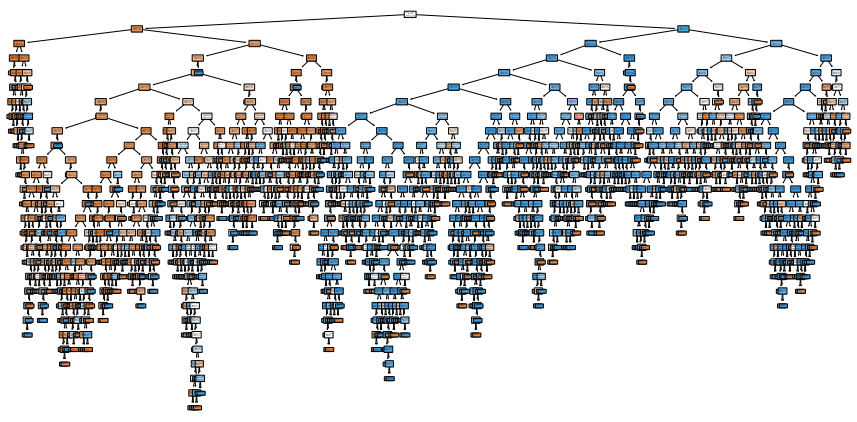

In [154]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 7.5))
plot_tree(model_tree, filled = True, rounded = True)

In [149]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators = 50,
                               bootstrap = True,
                               max_features = 'sqrt',
                               oob_score = True,
                               random_state = 21)
model_forest.fit(x_train_smote, y_train_smote)
prediksi_forest = model_forest.predict(x_test)

In [150]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_forest.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_forest))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_forest))

Train Accuracy = 0.9999332799572992
Test Accuracy = 0.8990990990990991
Confusion Matrix = [[1741  133]
 [  91  255]]


In [164]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.906 (0.007)


In [178]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=123)
model_ada.fit(x_train_smote, y_train_smote)
prediksi_ada = model_ada.predict(x_test)

In [179]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_ada.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_ada))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_ada))

Train Accuracy = 0.9059247397918335
Test Accuracy = 0.8846846846846846
Confusion Matrix = [[1719  155]
 [ 101  245]]


In [181]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=1)
model_gb.fit(x_train_smote, y_train_smote)
prediksi_gb = model_gb.predict(x_test)

In [182]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_gb.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_gb))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_gb))

Train Accuracy = 0.9311449159327462
Test Accuracy = 0.9009009009009009
Confusion Matrix = [[1741  133]
 [  87  259]]


In [185]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Hafiz' is not recognized as an internal or external command,
operable program or batch file.


In [186]:
259/(259+87)

0.7485549132947977

In [187]:
1741/(1741+133)

0.9290288153681964

In [198]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
 
#get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, x_train_smote, y_train_smote):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, x_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x_train_smote, y_train_smote)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

ValueError: 'sensitivity' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=500, random_state=123)
model_gb.fit(x_train_smote, y_train_smote)
prediksi_gb = model_gb.predict(x_test)

In [196]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_gb.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_gb))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_gb))

Train Accuracy = 0.96210301574593
Test Accuracy = 0.9103603603603604
Confusion Matrix = [[1786   88]
 [ 111  235]]


In [210]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_smote, y_train_smote)
prediksi_knn = model_knn.predict(x_test)


In [211]:
print('Train Accuracy =', metrics.accuracy_score(y_train_smote, model_knn.predict(x_train_smote)))
print('Test Accuracy =', metrics.accuracy_score(y_test, prediksi_knn))
print('Confusion Matrix =', metrics.confusion_matrix(y_test, prediksi_knn))

Train Accuracy = 0.9163997864958634
Test Accuracy = 0.7675675675675676
Confusion Matrix = [[1464  410]
 [ 106  240]]


In [199]:
data_uji = np.array(data_uji)

In [201]:
prediksi_uji = model_gb.predict(data_uji)

In [204]:
prediksi_uji = pd.DataFrame(prediksi_uji)

In [205]:
prediksi_uji.to_csv('Hasil Prediksi Data Uji.csv', index=False)

In [209]:
prediksi_uji.value_counts()

0    1055
1     178
dtype: int64

Mambersihkan Data Uji

In [155]:
data_uji = pd.read_csv('Data Uji Online Shoppers.csv')

In [156]:
data_uji.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [157]:
data_uji[data_uji.Administrative_Duration<0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,-1.0,0,-1.0,1,-1.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
10,0,-1.0,0,-1.0,1,-1.0,0.2,0.2,0.0,0.0,Feb,2,2,4,3,Returning_Visitor,False
64,0,-1.0,0,-1.0,1,-1.0,0.2,0.2,0.0,0.0,Mar,3,2,3,3,Returning_Visitor,False


In [158]:
data_uji['Administrative_Duration'][data_uji['Administrative_Duration']<0] = data_train.Administrative_Duration.median()
data_uji['Informational_Duration'][data_uji['Informational_Duration']<0] = data_train.Informational_Duration.median()
data_uji['ProductRelated_Duration'][data_uji['ProductRelated_Duration']<0] = data_train.ProductRelated_Duration.median()

C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hafiz Yusuf Heraldi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

In [159]:
data_uji.Month = data_uji.Month.map({'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12})
data_uji.VisitorType = data_uji.VisitorType.map({'Returning_Visitor':1,'New_Visitor':2,'Other':3})
data_uji.Weekend = data_uji.Weekend.map({True:1, False:0})

AttributeError: 'DataFrame' object has no attribute 'Revenue'

In [162]:
data_uji

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.695196,-0.448183,-0.395193,-0.247242,-0.696302,-0.622966,3.657464,3.222548,-0.315263,-0.306063,2,4,1,9,3,1,0
1,-0.096103,-0.158040,-0.395193,-0.245484,-0.205633,0.233486,-0.288613,-0.551628,-0.315263,-0.306063,2,1,1,9,3,1,0
2,-0.695196,-0.445967,-0.395193,-0.245484,-0.673999,-0.606382,-0.460181,1.167874,-0.315263,-0.306063,2,2,2,1,3,1,0
3,-0.695196,-0.445967,-0.395193,-0.245484,-0.272542,0.907358,-0.460181,-0.681332,-0.315263,-0.306063,2,2,4,4,4,1,0
4,-0.695196,-0.445967,-0.395193,-0.245484,-0.562483,-0.590470,0.128054,0.580825,-0.315263,2.753536,2,2,2,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,-0.695196,-0.445967,0.384218,-0.209686,-0.517877,-0.479602,0.363348,-0.030685,-0.315263,-0.306063,11,3,2,7,8,2,1
1229,-0.695196,-0.445967,1.163628,-0.095132,-0.450967,-0.548638,-0.166064,0.140537,-0.315263,-0.306063,12,2,2,2,1,1,0
1230,-0.695196,-0.445967,1.943039,-0.003848,-0.517877,-0.461674,0.226093,-0.316057,-0.315263,-0.306063,12,3,2,2,10,1,0
1231,0.203443,-0.152607,-0.395193,-0.245484,-0.272542,-0.487866,-0.288613,0.254686,-0.315263,-0.306063,12,2,2,1,2,1,0


In [161]:
def scale_data(array,means=rerata,stds=stadev):
    return (array-means)/stds

data_uji[["Administrative","Administrative_Duration", "Informational","Informational_Duration", "ProductRelated",
            "ProductRelated_Duration","BounceRates", "ExitRates", "PageValues",
            "SpecialDay"]] = scale_data(data_uji[["Administrative","Administrative_Duration", 
                                                              "Informational", "Informational_Duration", 
                                                              "ProductRelated", "ProductRelated_Duration", 
                                                              "BounceRates", "ExitRates", "PageValues", "SpecialDay"]])

In [163]:
data_uji.to_csv('Data Uji Bersih.csv', index=False)

In [3]:
!pip install collection

  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5119 sha256=9906d4b36025a8af8a3fad438a1184fdb413cec86854d47a213dbc63e81f087b
  Stored in directory: c:\users\hafiz yusuf heraldi\appdata\local\pip\cache\wheels\45\ed\3c\29a1c0600bb908a2e7421dc3a3775cbaed434a71b4ed93a439
Successfully built collection


In [2]:
!pip install xgboost